# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees often split into two, typically less than or more, and keeps going on until n.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Tress force splititng the data into parts and because of that they're unable to be linear and work better for curves.

3. Why is the Gini a good loss function for categorical target variables?

It shows how mixed the classes in a group could be, lower meaning better because it's making a more concise prediction.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees overfit because they force splitting which means more noise can get through. It's constrained by enforcing a limit on how deep the tree goes.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False, they work in well even with categorial vars because they're still able to split the data.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

2 branches it more cleaner and has a faster runtime, meaning it's easier to do calculations and traverse the tree.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Deep trees show that it fits the data well while possibly being overfitting, where its vice versa for the other shallow tree.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [38]:
df = pd.read_csv('cars_hw.csv')
print(df.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [39]:
df = df.drop(columns=['Unnamed: 0'])

# List of categorical columns to one-hot encode
categorical_cols = ['Make', 'Color', 'Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission', 'Transmission_Type']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns='Price')  # Features
y = df_encoded['Price']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

Best min_samples_leaf: 5
Highest R^2 on test data: 0.8228


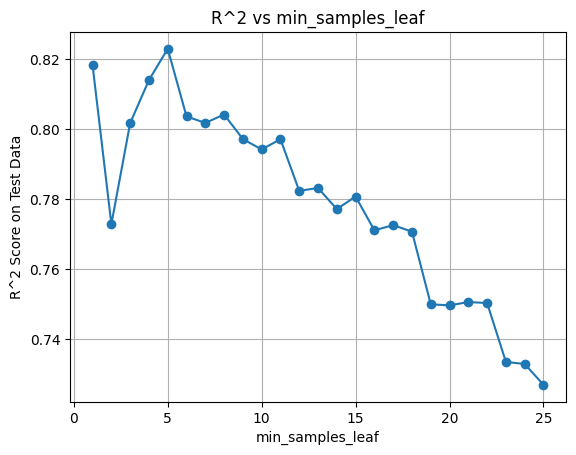

In [40]:
test_r2_scores = []

for leaf_count in range(1, 26):
    tree_model = DecisionTreeRegressor(min_samples_leaf=leaf_count, random_state=42)
    tree_model.fit(X_train, y_train)
    test_predictions = tree_model.predict(X_test)

    r2 = r2_score(y_test, test_predictions)
    test_r2_scores.append(r2)

best_leaf_count = test_r2_scores.index(max(test_r2_scores)) + 1
best_r2_score = max(test_r2_scores)

print(f"Best min_samples_leaf: {best_leaf_count}")
print(f"Highest R^2 on test data: {best_r2_score:.4f}")

plt.plot(range(1, 26), test_r2_scores, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('R^2 Score on Test Data')
plt.title('R^2 vs min_samples_leaf')
plt.grid(True)
plt.show()

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

Final R^2 on test data: 0.8228
Final RMSE on test data: 142545.56


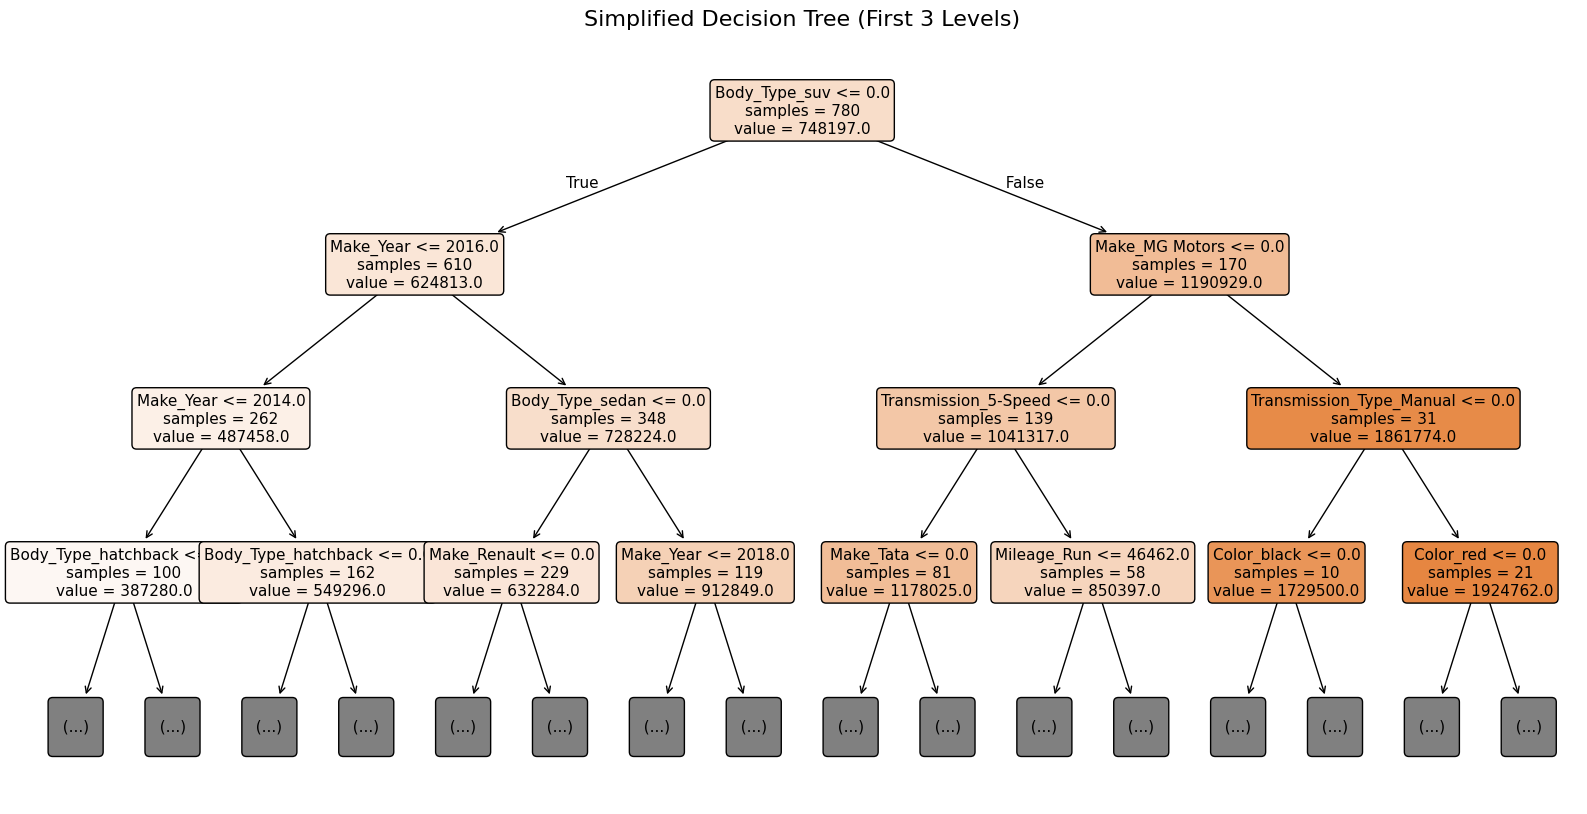

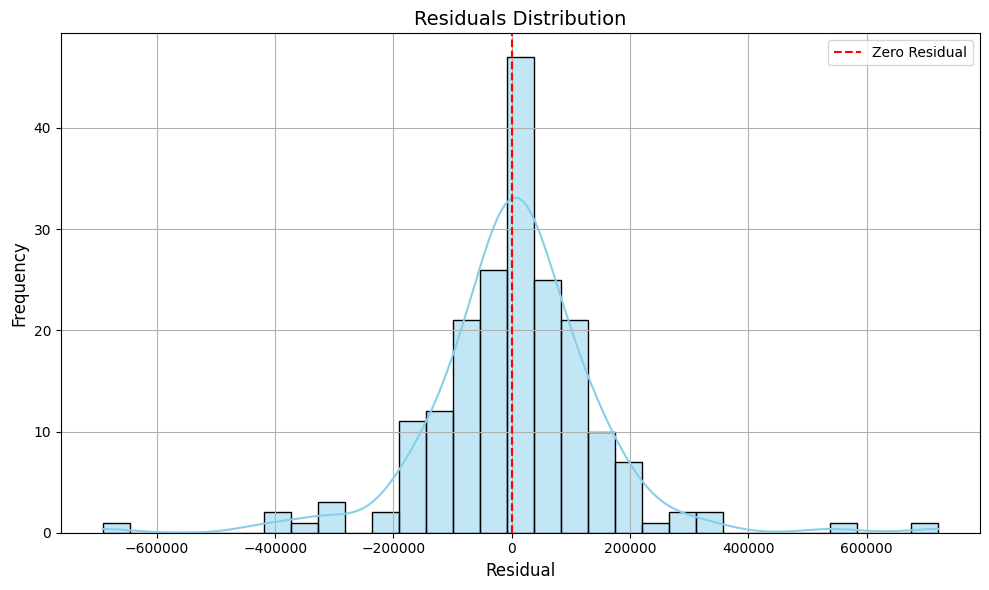

It's near 0 and not symmetrical, meaning that there might be bias


In [41]:
# Fit the final decision tree
final_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf_count, random_state=42)
final_tree.fit(X_train, y_train)

# Predict on test data
final_predictions = final_tree.predict(X_test)

# Compute R^2 and RMSE
final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print(f"Final R^2 on test data: {final_r2:.4f}")
print(f"Final RMSE on test data: {final_rmse:.2f}")

# 🌳 Clean and simple tree visualization
plt.figure(figsize=(20, 10))
plot_tree(
    final_tree,
    feature_names=X_train.columns,
    filled=True,
    max_depth=3,             # Limit depth for readability
    fontsize=11,
    rounded=True,            # Rounded boxes
    impurity=False,          # Hides Gini/variance
    precision=0              # No decimals on outputs
)
plt.title("Simplified Decision Tree (First 3 Levels)", fontsize=16)
plt.show()

# 📉 Residual plot
residuals = y_test - final_predictions

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Residuals Distribution", fontsize=14)
plt.xlabel("Residual", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("It's near 0 and not symmetrical, meaning that there might be bias")

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?


In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_predictions = lin_reg.predict(X_test)

lin_r2 = r2_score(y_test, lin_predictions)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_predictions))

print(f"Linear Regression R^2 on test data: {lin_r2:.4f}")
print(f"Linear Regression RMSE on test data: {lin_rmse:.2f}")
print(f"\nDecision Tree R^2 on test data: {final_r2:.4f}")
print(f"Decision Tree RMSE on test data: {final_rmse:.2f}")

print("The Decision Tree performs slightly better than the Linear Regression model, because It has a higher R², meaning it \nexplains a bit more of the variance in the target (price).It has a lower RMSE, meaning its average prediction error is slightly smaller.")

Linear Regression R^2 on test data: 0.8203
Linear Regression RMSE on test data: 143575.20

Decision Tree R^2 on test data: 0.8228
Decision Tree RMSE on test data: 142545.56
The Decision Tree performs slightly better than the Linear Regression model, because It has a higher R², meaning it 
explains a bit more of the variance in the target (price).It has a lower RMSE, meaning its average prediction error is slightly smaller.


6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

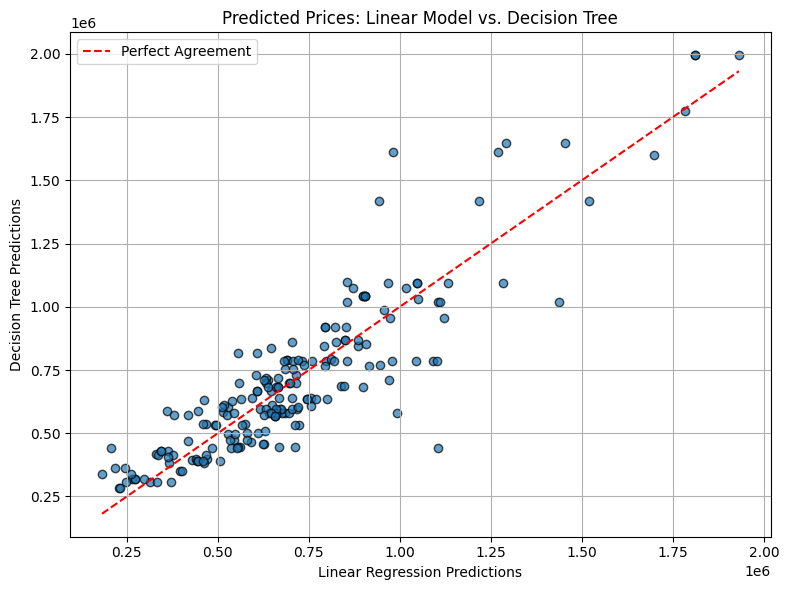

The pointer cluster around it, meanining that it falls close to simiar predictions but after
 1.00 it begins to really fan out meaning it misses non-linear patterns


In [43]:
tree_preds = final_tree.predict(X_test)
lin_preds = lin_reg.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(lin_preds, tree_preds, alpha=0.7, edgecolor='k')
plt.plot([min(lin_preds), max(lin_preds)], [min(lin_preds), max(lin_preds)], color='red', linestyle='--', label='Perfect Agreement')

plt.title("Predicted Prices: Linear Model vs. Decision Tree")
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("The pointer cluster around it, meanining that it falls close to simiar predictions but after\n 1.00 it begins to really fan out meaning it misses non-linear patterns")

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [44]:
ratings_df = pd.read_csv('corporate_ratings.csv')
print(ratings_df.head())

  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

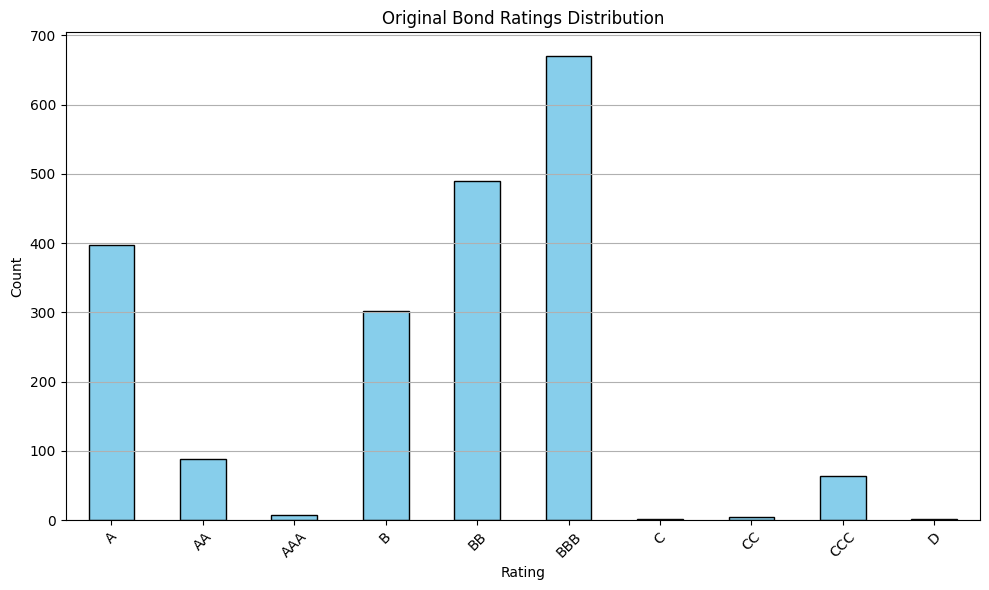

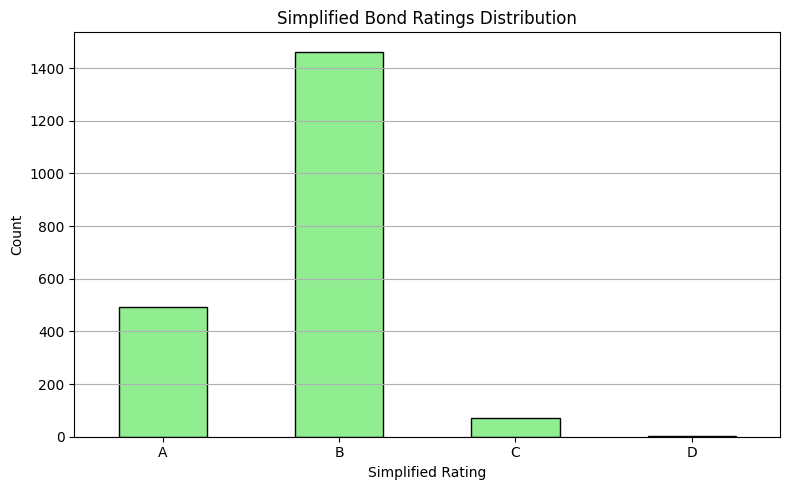

In [45]:
plt.figure(figsize=(10, 6))
ratings_df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Original Bond Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

def simplify_rating(rating):
    if rating in ['AAA', 'AA', 'A']:
        return 'A'
    elif rating in ['BBB', 'BB', 'B']:
        return 'B'
    elif rating in ['CCC', 'CC', 'C']:
        return 'C'
    elif rating == 'D':
        return 'D'
    else:
        return 'Other'

ratings_df['Simplified_Rating'] = ratings_df['Rating'].apply(simplify_rating)

plt.figure(figsize=(8, 5))
ratings_df['Simplified_Rating'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Simplified Bond Ratings Distribution")
plt.xlabel("Simplified Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

In [46]:
drop_cols = ['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name']
ratings_df_clean = ratings_df.drop(columns=drop_cols)
ratings_df_encoded = pd.get_dummies(ratings_df_clean, columns=['Sector'], drop_first=True)
X = ratings_df_encoded.drop(columns='Simplified_Rating')
y = ratings_df_encoded['Simplified_Rating']

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

Accuracy: 0.6823


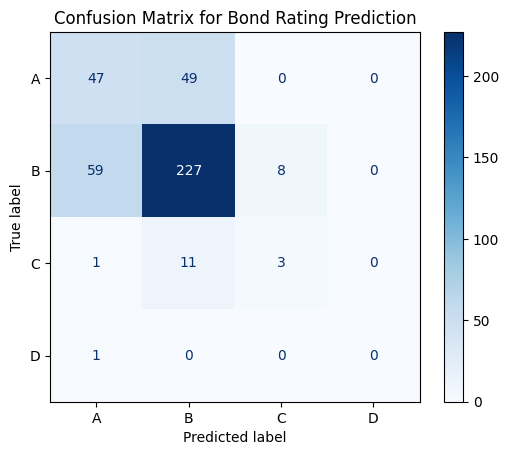

In [53]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A', 'B', 'C', 'D'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Bond Rating Prediction")
plt.show()

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

The model performs well at predicting class B, with 227 correct predictions. However, there is significant confusion between classes A and B, with around 50 cases where A is predicted as B and vice versa. Predictions for classes C and D are rare and mostly incorrect, likely due to class imbalance. Overall, the model is strong at identifying B-rated bonds but struggles with the other rating categories.